In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [3]:
df = pd.read_csv('/kaggle/input/drug-classification/drug200.csv')

In [4]:
# Veri tipi ve eksik değer kontrolü
print("Veri seti bilgisi:\n")
print(df.info())
print("\nSütunlardaki eksik değer sayısı:\n")
print(df.isnull().sum())


Veri seti bilgisi:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None

Sütunlardaki eksik değer sayısı:

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


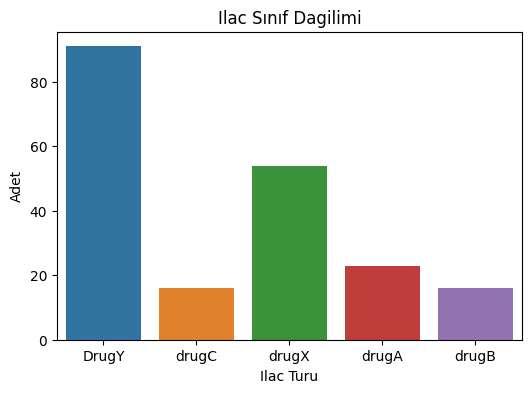

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Drug', data=df)
plt.title("Ilac Sınıf Dagilimi")
plt.xlabel("Ilac Turu")
plt.ylabel("Adet")
plt.show()

In [6]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'])

print(df_encoded.head(5))


   Age  Na_to_K   Drug  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  \
0   23   25.355  DrugY   True  False     True   False      False   
1   47   13.093  drugC  False   True    False    True      False   
2   47   10.114  drugC  False   True    False    True      False   
3   28    7.798  drugX   True  False    False   False       True   
4   61   18.043  DrugY   True  False    False    True      False   

   Cholesterol_HIGH  Cholesterol_NORMAL  
0              True               False  
1              True               False  
2              True               False  
3              True               False  
4              True               False  


In [7]:
le = LabelEncoder()
df_encoded['Drug'] = le.fit_transform(df_encoded['Drug'])

class_names = le.classes_

print(df_encoded.head(5))


   Age  Na_to_K  Drug  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  \
0   23   25.355     0   True  False     True   False      False   
1   47   13.093     3  False   True    False    True      False   
2   47   10.114     3  False   True    False    True      False   
3   28    7.798     4   True  False    False   False       True   
4   61   18.043     0   True  False    False    True      False   

   Cholesterol_HIGH  Cholesterol_NORMAL  
0              True               False  
1              True               False  
2              True               False  
3              True               False  
4              True               False  


In [8]:
X = df_encoded.drop('Drug', axis=1)
y = df_encoded['Drug']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, C=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))


Doğruluk (Accuracy): 0.7833333333333333
              precision    recall  f1-score   support

       DrugY       0.87      1.00      0.93        27
       drugA       1.00      0.29      0.44         7
       drugB       1.00      0.60      0.75         5
       drugC       0.00      0.00      0.00         5
       drugX       0.65      0.94      0.77        16

    accuracy                           0.78        60
   macro avg       0.70      0.56      0.58        60
weighted avg       0.77      0.78      0.74        60



In [10]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Doğruluk (Accuracy):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=class_names))


Random Forest Doğruluk (Accuracy): 0.9833333333333333
              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        27
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk (cross-val):", grid_search.best_score_)


En iyi parametreler: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
En iyi doğruluk (cross-val): 0.9857142857142858


In [12]:
best_rf = RandomForestClassifier(
    max_depth=10, min_samples_split=5, n_estimators=50, random_state=42)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Test seti doğruluğu:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))


Test seti doğruluğu: 0.9833333333333333
              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        27
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [13]:
# Modeli oluştur
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)

# Eğit
dt_model.fit(X_train, y_train)

# Tahmin yap
y_pred_dt = dt_model.predict(X_test)

# Sonuçları yazdır
print("Decision Tree Test Doğruluğu:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=class_names))


Decision Tree Test Doğruluğu: 0.9833333333333333
              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        27
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



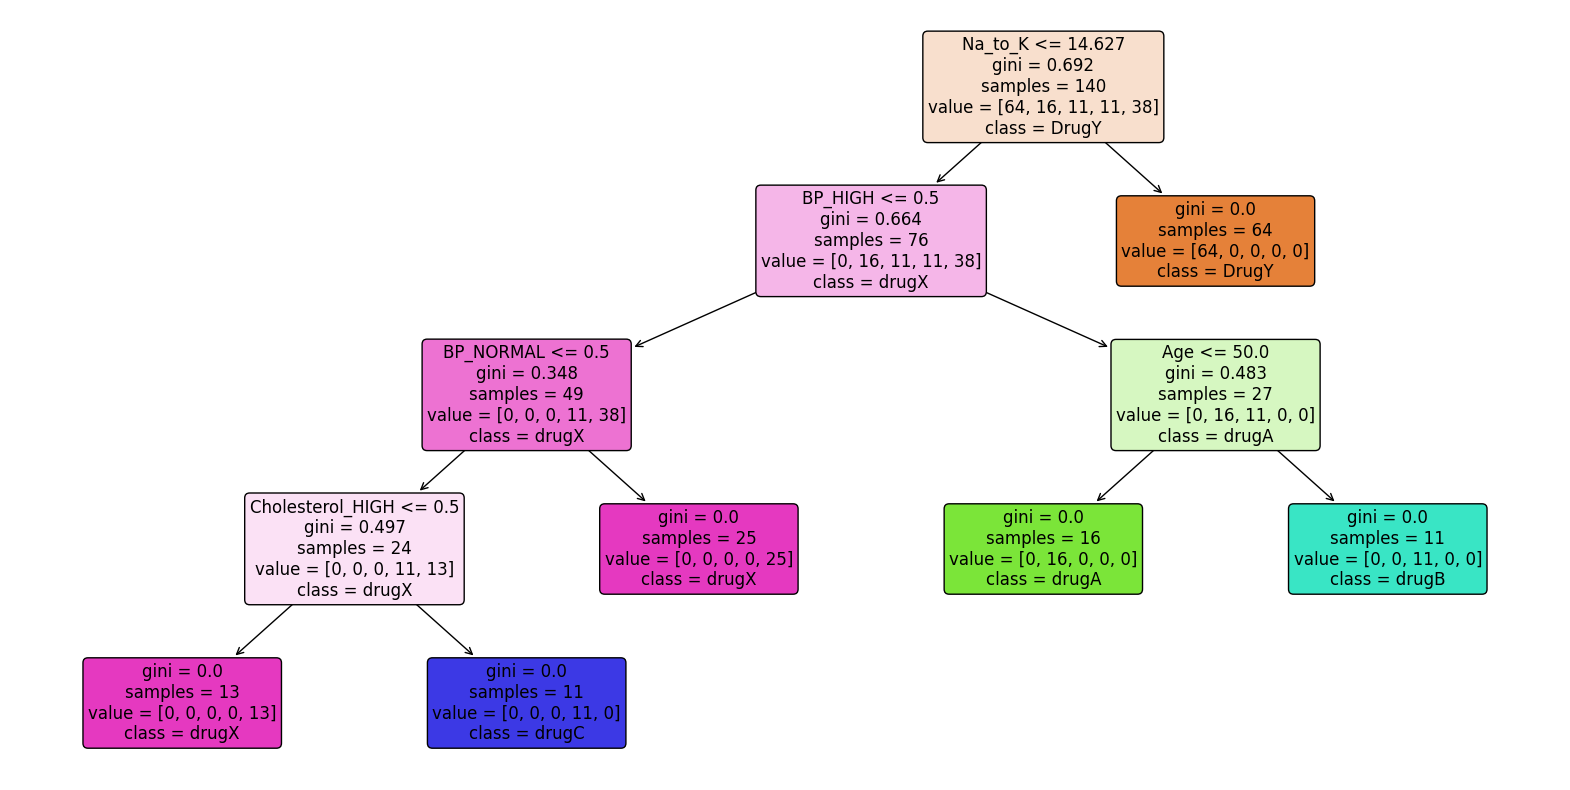

In [14]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=class_names, rounded=True, fontsize=12)
plt.show()


In [15]:
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)


Na_to_K               0.479234
BP_HIGH               0.210063
Age                   0.134581
Cholesterol_HIGH      0.123015
BP_NORMAL             0.053107
Sex_F                 0.000000
Sex_M                 0.000000
BP_LOW                0.000000
Cholesterol_NORMAL    0.000000
dtype: float64


In [16]:
# Modeli oluştur (kernel olarak 'rbf' varsayılan, iyi sonuç verir)
svm_model = SVC(random_state=42)

# Eğit
svm_model.fit(X_train, y_train)

# Tahmin yap
y_pred_svm = svm_model.predict(X_test)

# Sonuçları yazdır
print("SVM Test Doğruluğu:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=class_names))


SVM Test Doğruluğu: 0.6833333333333333
              precision    recall  f1-score   support

       DrugY       0.84      1.00      0.92        27
       drugA       0.00      0.00      0.00         7
       drugB       0.00      0.00      0.00         5
       drugC       0.00      0.00      0.00         5
       drugX       0.50      0.88      0.64        16

    accuracy                           0.68        60
   macro avg       0.27      0.38      0.31        60
weighted avg       0.51      0.68      0.58        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Test Doğruluğu (ölçeklendirilmiş veri):", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=class_names))


SVM Test Doğruluğu (ölçeklendirilmiş veri): 0.8166666666666667
              precision    recall  f1-score   support

       DrugY       0.85      0.81      0.83        27
       drugA       1.00      0.57      0.73         7
       drugB       0.50      0.40      0.44         5
       drugC       1.00      1.00      1.00         5
       drugX       0.76      1.00      0.86        16

    accuracy                           0.82        60
   macro avg       0.82      0.76      0.77        60
weighted avg       0.83      0.82      0.81        60



In [19]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

svm = SVC(random_state=42)

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk (cross-val):", grid_search.best_score_)

# En iyi modeli test setinde dene
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score
print("Test seti doğruluğu:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=class_names))


En iyi parametreler: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
En iyi doğruluk (cross-val): 0.9428571428571428
Test seti doğruluğu: 0.95
              precision    recall  f1-score   support

       DrugY       0.93      0.96      0.95        27
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      0.80      0.89         5
       drugX       0.94      0.94      0.94        16

    accuracy                           0.95        60
   macro avg       0.97      0.94      0.95        60
weighted avg       0.95      0.95      0.95        60

